In [1]:
import pandas as pd
import json

# Specify file paths
files = [
    "C:/Users/Asus/Downloads/StreamingHistory_music_0.json",
    "C:/Users/Asus/Downloads/StreamingHistory_music_1.json"
]

# Load and merge files
streaming_history = []
for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        streaming_history.extend(json.load(f))

# Convert to DataFrame
streaming_df = pd.DataFrame(streaming_history)

# Let's check the first 5 lines
print(streaming_df.head())


            endTime       artistName               trackName  msPlayed
0  2023-12-25 17:02       Funda Arar         Doldur Yüreğimi    111356
1  2023-12-26 10:43       Norm Ender  Parla - 100. Yıl Marşı      2730
2  2023-12-26 10:43       Sezen Aksu        Bir Çocuk Sevdim       790
3  2023-12-26 10:43  Stephen Sanchez       Until I Found You      3300
4  2023-12-26 11:17       Mert Demir            Ateşe Düştüm     66870


In [2]:
# Let's process the time columns
streaming_df['endTime'] = pd.to_datetime(streaming_df['endTime'])
streaming_df['date'] = streaming_df['endTime'].dt.date
streaming_df['hour'] = streaming_df['endTime'].dt.hour
streaming_df['weekday'] = streaming_df['endTime'].dt.weekday

# Convert listening time to seconds
streaming_df['msPlayed'] = streaming_df['msPlayed'] / 1000  # Milisaniyeden saniyeye

# Let's check the first 5 lines again
print(streaming_df.head())

              endTime       artistName               trackName  msPlayed  \
0 2023-12-25 17:02:00       Funda Arar         Doldur Yüreğimi   111.356   
1 2023-12-26 10:43:00       Norm Ender  Parla - 100. Yıl Marşı     2.730   
2 2023-12-26 10:43:00       Sezen Aksu        Bir Çocuk Sevdim     0.790   
3 2023-12-26 10:43:00  Stephen Sanchez       Until I Found You     3.300   
4 2023-12-26 11:17:00       Mert Demir            Ateşe Düştüm    66.870   

         date  hour  weekday  
0  2023-12-25    17        0  
1  2023-12-26    10        1  
2  2023-12-26    10        1  
3  2023-12-26    10        1  
4  2023-12-26    11        1  


In [3]:
# Most streamed artists
top_artists = streaming_df['artistName'].value_counts().head(10)
print("Top 10 Artists:\n", top_artists)

# Most listened songs
top_tracks = streaming_df['trackName'].value_counts().head(10)
print("Top 10 Tracks:\n", top_tracks)

# Hourly listening density
listening_by_hour = streaming_df.groupby('hour').size()
print("Listening by Hour:\n", listening_by_hour)

Top 10 Artists:
 Canozan                 693
Sezen Aksu              683
Hande Yener             569
Yalın                   528
Mert Demir              385
Gülden Karaböcek        370
Dolu Kadehi Ters Tut    258
Sertab Erener           231
Dedublüman              214
Murat Dalkılıç          195
Name: artistName, dtype: int64
Top 10 Tracks:
 Bir Bela                    211
Ağlama ben ağlarım          188
Ben Senin Delinim           147
Sen Evlisin                 143
Gel Barışalım Artık         142
Toprak Yağmura - Akustik    139
Dilerim Ki                  139
Yalan Dünya                 108
Dön Bana                     90
Lan                          89
Name: trackName, dtype: int64
Listening by Hour:
 hour
0       65
1       47
2       44
3      196
4      474
5      324
6      266
7      529
8      457
9      621
10     806
11     709
12     782
13    1001
14    1415
15     839
16     471
17     876
18     880
19     860
20    1005
21     927
22     306
23     134
dtype: int64


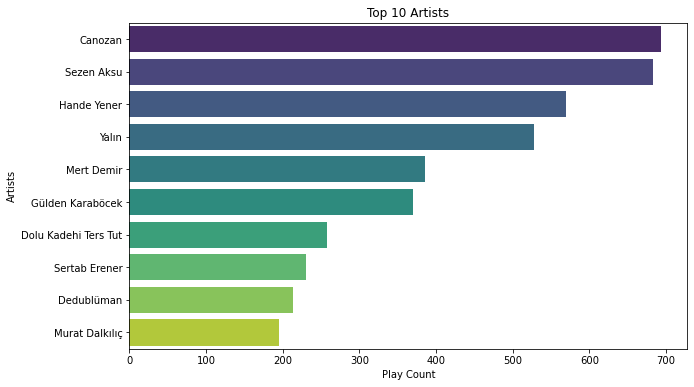

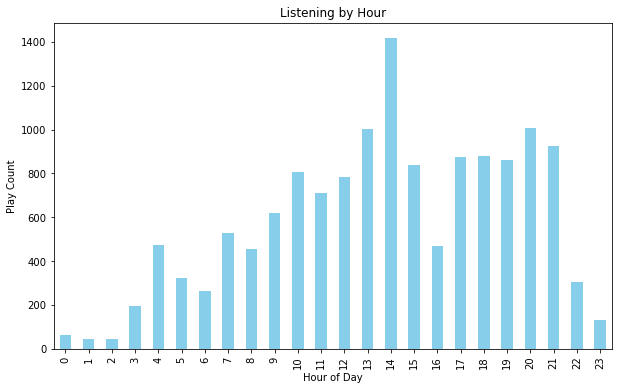

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Artists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title("Top 10 Artists")
plt.xlabel("Play Count")
plt.ylabel("Artists")
plt.show()

# Hourly Listening Intensity
plt.figure(figsize=(10, 6))
listening_by_hour.plot(kind='bar', color='skyblue')
plt.title("Listening by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Play Count")
plt.show()


Top 10 Tracks:
 Bir Bela                    211
Ağlama ben ağlarım          188
Ben Senin Delinim           147
Sen Evlisin                 143
Gel Barışalım Artık         142
Toprak Yağmura - Akustik    139
Dilerim Ki                  139
Yalan Dünya                 108
Dön Bana                     90
Lan                          89
Name: trackName, dtype: int64


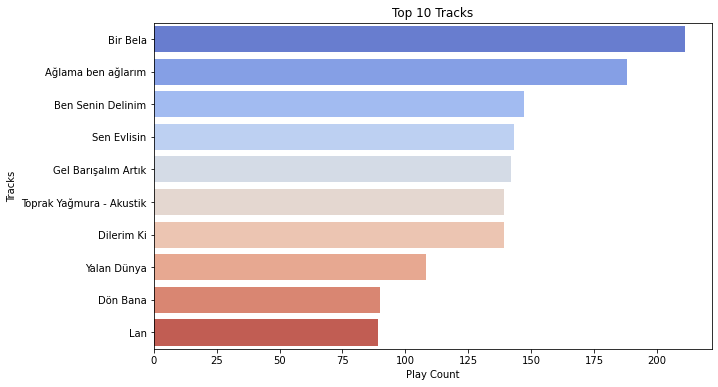

In [5]:
# Most listened songs
top_tracks = streaming_df['trackName'].value_counts().head(10)
print("Top 10 Tracks:\n", top_tracks)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tracks.values, y=top_tracks.index, palette='coolwarm')
plt.title("Top 10 Tracks")
plt.xlabel("Play Count")
plt.ylabel("Tracks")
plt.show()


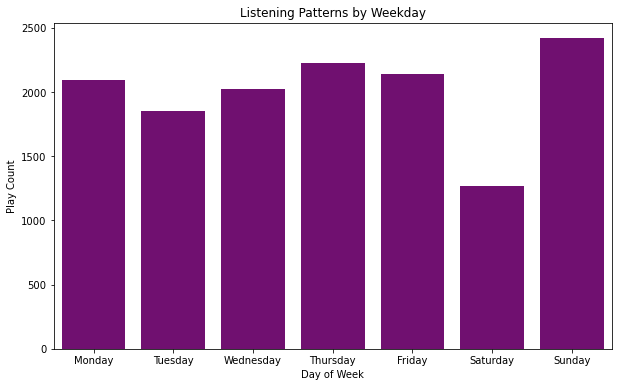

In [6]:
# Listening intensity by day of the week
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
listening_by_weekday = streaming_df.groupby('weekday').size()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_labels, y=listening_by_weekday.values, color='purple')
plt.title("Listening Patterns by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Play Count")
plt.show()

   season   msPlayed  hoursPlayed          popularGenres
0  Autumn  324101971    90.028325    Soulful, Reflective
1  Spring  302114959    83.920822          Upbeat, Indie
2  Summer  405537241   112.649234       Energetic, Dance
3  Winter  209478719    58.188533  Melancholic, Acoustic
      season            artistName  msPlayed  hoursPlayed
343   Autumn            Sezen Aksu  28750329     7.986203
79    Autumn               Canozan  25175738     6.993261
178   Autumn           Hande Yener  24708869     6.863575
167   Autumn      Gülden Karaböcek  15254334     4.237315
260   Autumn        Murat Dalkılıç  10915804     3.032168
673   Spring            Mert Demir  24918188     6.921719
737   Spring            Sezen Aksu  23774433     6.604009
614   Spring           Hande Yener  20450925     5.680813
522   Spring               Canozan  20006584     5.557384
544   Spring  Dolu Kadehi Ters Tut  15278820     4.244117
985   Summer           Hande Yener  43551438    12.097622
1131  Summer       

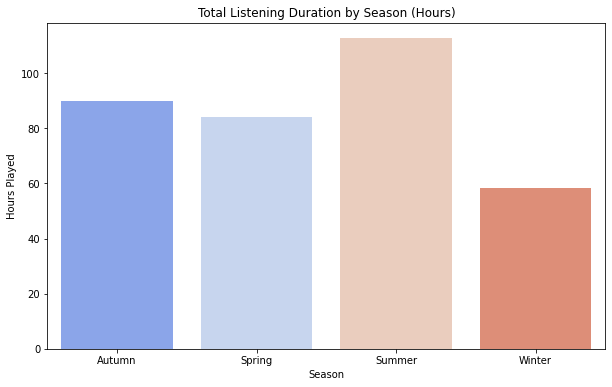

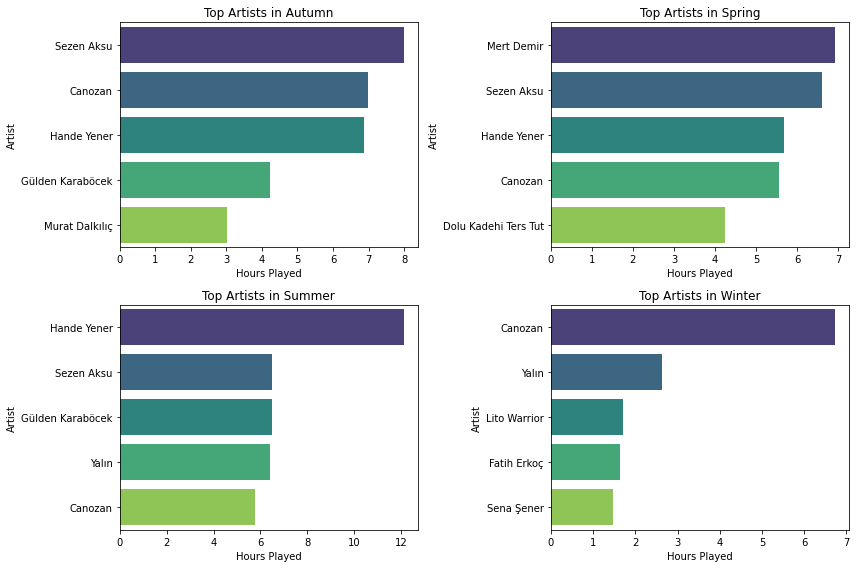

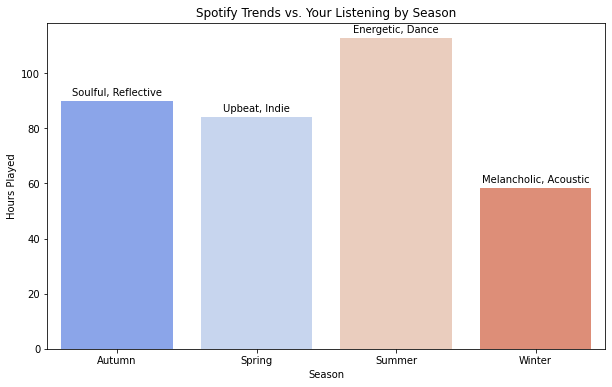

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify file paths
files = [
    "C:/Users/Asus/Downloads/StreamingHistory_music_0.json",
    "C:/Users/Asus/Downloads/StreamingHistory_music_1.json"
]

# Define the get_season function
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Load and merge files
streaming_history = []
for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        streaming_history.extend(json.load(f))

# Convert to DataFrame
streaming_data = pd.DataFrame(streaming_history)

# Process time columns
streaming_data['endTime'] = pd.to_datetime(streaming_data['endTime'])
streaming_data['season'] = streaming_data['endTime'].apply(lambda x: get_season(x))

seasonal_playtime = streaming_data.groupby('season')['msPlayed'].sum().reset_index()
seasonal_playtime['hoursPlayed'] = seasonal_playtime['msPlayed'] / (1000 * 60 * 60)

# Group by season and artistName
artist_seasonal_data = streaming_data.groupby(['season', 'artistName'])['msPlayed'].sum().reset_index()
artist_seasonal_data['hoursPlayed'] = artist_seasonal_data['msPlayed'] / (1000 * 60 * 60)

# Find top artists for each season
top_artists_per_season = artist_seasonal_data.sort_values(by=['season', 'hoursPlayed'], ascending=[True, False])
top_artists_per_season = top_artists_per_season.groupby('season').head(5)

# Mock Spotify seasonal trends data
spotify_seasonal_trends = pd.DataFrame({
    'season': ['Winter', 'Spring', 'Summer', 'Autumn'],
    'popularGenres': ['Melancholic, Acoustic', 'Upbeat, Indie', 'Energetic, Dance', 'Soulful, Reflective']
})

# Group user data by season and sum listening hours
artist_seasonal_summary = streaming_data.groupby('season')['msPlayed'].sum().reset_index()
artist_seasonal_summary['hoursPlayed'] = artist_seasonal_summary['msPlayed'] / (1000 * 60 * 60)

# Merge user data with Spotify trends
comparison = pd.merge(artist_seasonal_summary, spotify_seasonal_trends, on='season', how='left')

# Display the comparison table for debugging
print(comparison)

# Display the result for debugging
print(top_artists_per_season)

# Seasonal Listening Duration
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_playtime['season'], y=seasonal_playtime['hoursPlayed'], palette='coolwarm')
plt.title("Total Listening Duration by Season (Hours)")
plt.xlabel("Season")
plt.ylabel("Hours Played")
plt.show()

# Top Artists by Season
plt.figure(figsize=(12, 8))
for i, season in enumerate(top_artists_per_season['season'].unique()):
    plt.subplot(2, 2, i + 1)
    data = top_artists_per_season[top_artists_per_season['season'] == season]
    sns.barplot(x=data['hoursPlayed'], y=data['artistName'], palette='viridis')
    plt.title(f"Top Artists in {season}")
    plt.xlabel("Hours Played")
    plt.ylabel("Artist")
    plt.tight_layout()
plt.show()

# Spotify Trends vs. User Data
plt.figure(figsize=(10, 6))
sns.barplot(x=comparison['season'], y=comparison['hoursPlayed'], palette='coolwarm', label='Your Listening (Hours)')
plt.title("Spotify Trends vs. Your Listening by Season")
plt.xlabel("Season")
plt.ylabel("Hours Played")
for i, genres in enumerate(comparison['popularGenres']):
    plt.text(i, comparison['hoursPlayed'].iloc[i] + 2, genres, ha='center', fontsize=10, color='black')
plt.show()


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load and preprocess the data
# Assuming `streaming_data` is already loaded
streaming_data['endTime'] = pd.to_datetime(streaming_data['endTime'])
streaming_data['hour'] = streaming_data['endTime'].dt.hour
streaming_data['weekday'] = streaming_data['endTime'].dt.weekday
streaming_data['season'] = streaming_data['endTime'].apply(lambda x: get_season(x))

# One-hot encode categorical features (e.g., 'season')
encoder = OneHotEncoder(sparse=False)
encoded_seasons = encoder.fit_transform(streaming_data[['season']])
encoded_seasons_df = pd.DataFrame(encoded_seasons, columns=encoder.get_feature_names_out(['season']))

# Add encoded seasons to the DataFrame
streaming_data = pd.concat([streaming_data, encoded_seasons_df], axis=1)

# Prepare features (X) and target (y)
X = streaming_data[['hour', 'weekday'] + list(encoder.get_feature_names_out(['season']))]
y = streaming_data['msPlayed'] / (1000 * 60)  # Convert to minutes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)


Mean Squared Error: 3.0144478355643987
R-squared: 0.003432185352440831
         Feature  Coefficient
0           hour    -0.023856
1        weekday    -0.017077
2  season_Autumn     0.070628
3  season_Spring    -0.217318
4  season_Summer     0.051439
5  season_Winter     0.095251


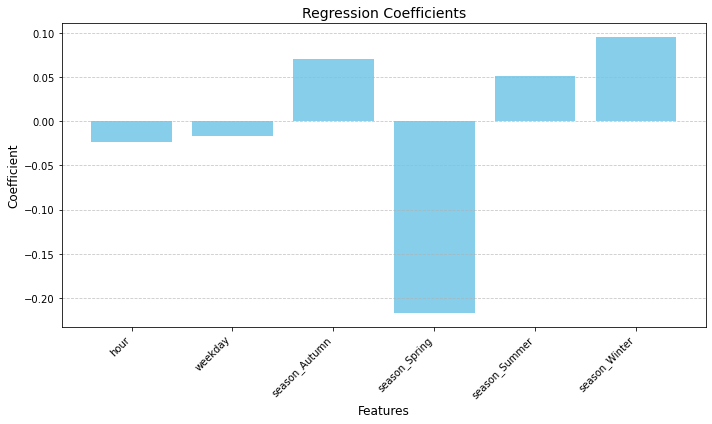

In [23]:
import matplotlib.pyplot as plt

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.bar(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.title('Regression Coefficients', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
